In [1]:
# display setting
library(IRdisplay)
library(repr)
options(repr.plot.width=8, repr.plot.height=6)

# 지자체 인허가 업종 리스트 수집
$$ $$
* 제공사이트 : http://www.localdata.kr/
$$ $$
* 주의하실 점!
  - 아래 소개되는 방법은 오픈API를 수집하는 일반적인 방법이 아님을 밝힙니다. 
  - 다만, 아래 내용을 보시고 다른 사이트에서 수집하실 때 힌트를 얻어가시길 바랍니다. 
$$ $$
* 오류사항이 있거나, 의견이 있으시면 아래 이메일로 연락주시기 바랍니다.
  - <kevin.na74@gmail.com>

## 준비
$$ $$
* 제공사이트 탐색
* API Key 발급, 조회
* 호출URL 조건 추가 등

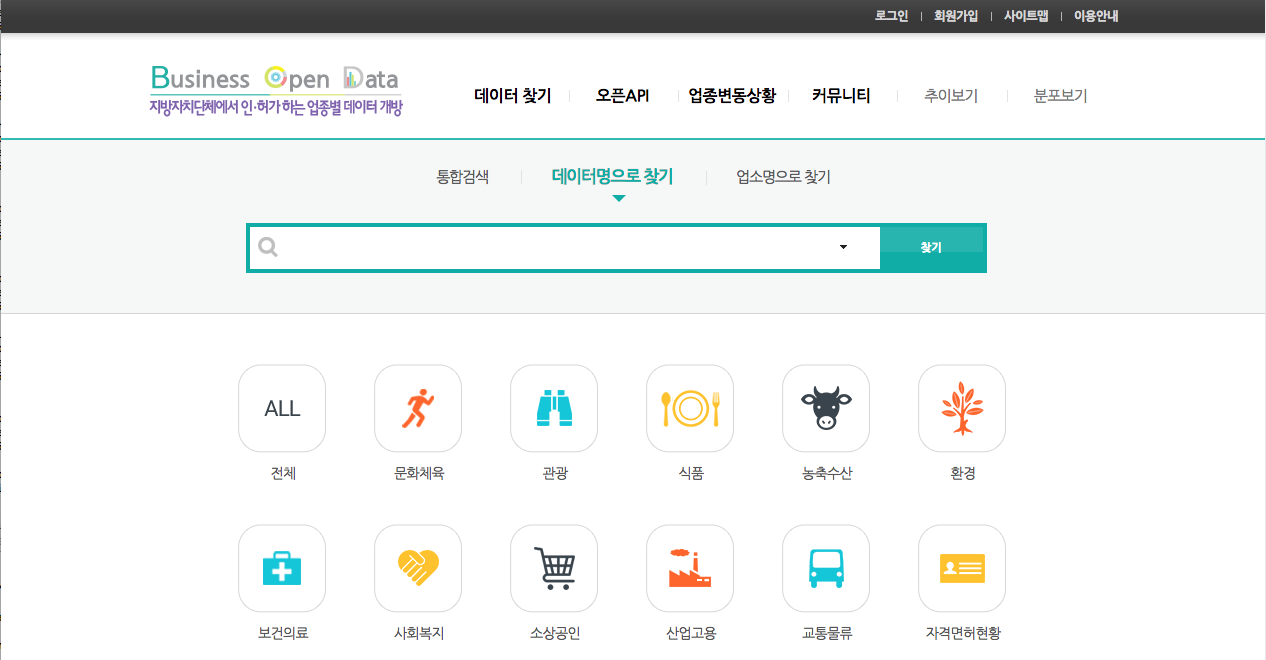

In [2]:
# 인허가 업종별 데이터 개방 사이트 메인화면입니다. 
display_png(file="./Image/메인화면.png")

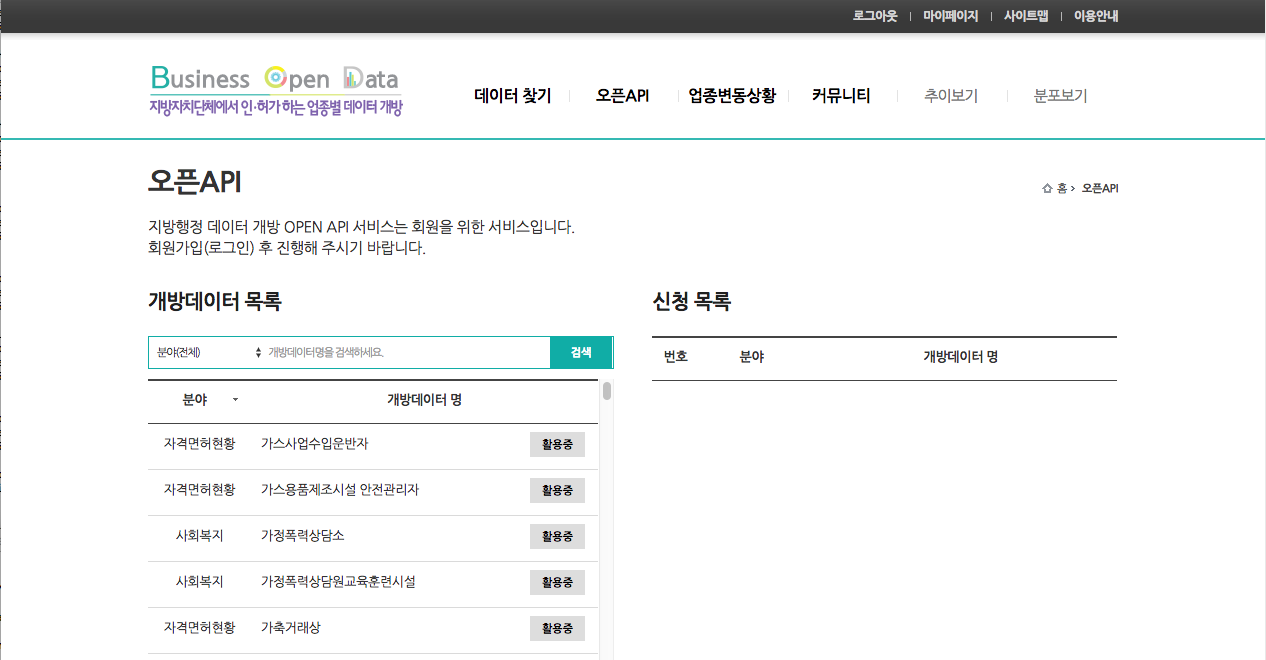

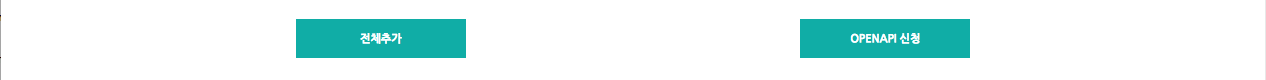

In [3]:
# [API Key 발급] 회원가입 및 로그인 후 상단 중앙 메뉴 중 "오픈API"를 클릭합니다. 
# (2017년 9월 12일 기준 전체 463개 업종 제공 중)
# 왼쪽 목록에서 원하는 업종을 선택 및 추가한 후, 
# 오른쪽 신청 목록 하단에 "OPENAPI 신청" 버튼을 클릭합니다. 
display_png(file="./Image/오픈API.png")
display_png(file="./Image/key발급.png")

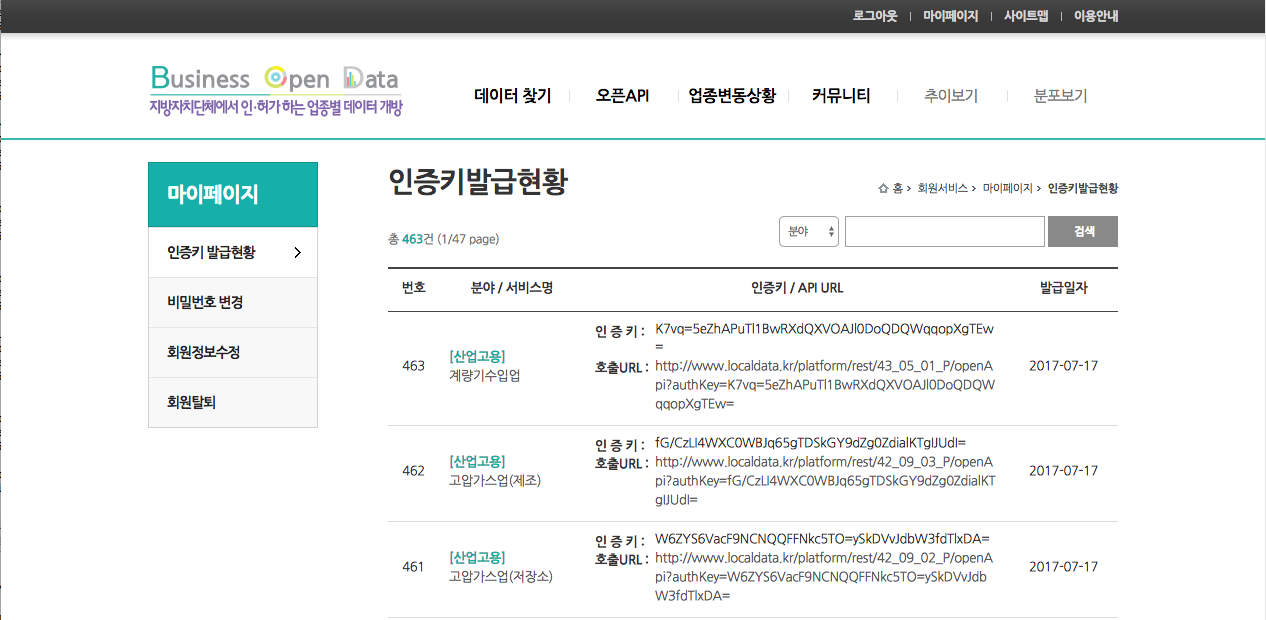

In [4]:
# "마이페이지" 화면에서 발급신청한 API Key를 조회할 수 있습니다.
# 일반적으로 "공통의 URL"와 "인증키"를 조합하여 "호출하는 URL"을 생성하는데 
# 이 사이트는 업종별로 "호출URL"을 제공합니다. 
display_png(file="./Image/Key조회.png")

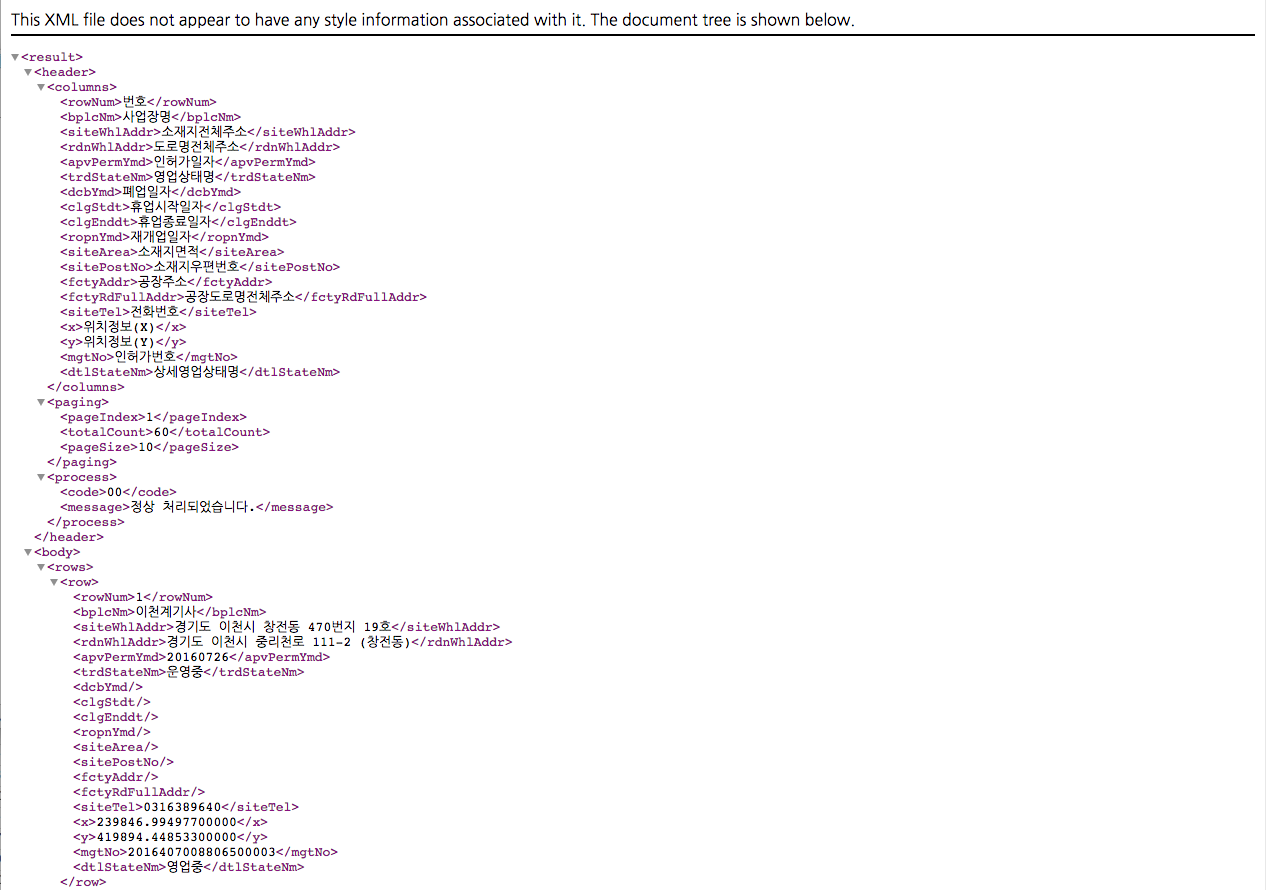

In [5]:
# "계량기수입업" 호출URL을 클릭하면 다음과 같습니다. 
display_png(file="./Image/XML예시1.png")

# "header"의 "columns"에서 제공하는 컬럼명들을 확인할 수 있고, 
# "paging"에서는 총 건수를 제시됩니다. (60건 제공)
# "계량기수입업"은 사업장명, 소재지전체주소, 인허가일자 등이 제공됩니다. 
# 업종별로 제공되는 컬럼명이 다를 수 있습니다!! 

[1] "http://www.localdata.kr/platform/rest/43_05_01_P/openApi?authKey=K7vq=5eZhAPuTl1BwRXdQXVOAJl0DoQDQWqqopXgTEw=&bgnYmd=20170101&endYmd=20171231&localCode=6110000&state=01"


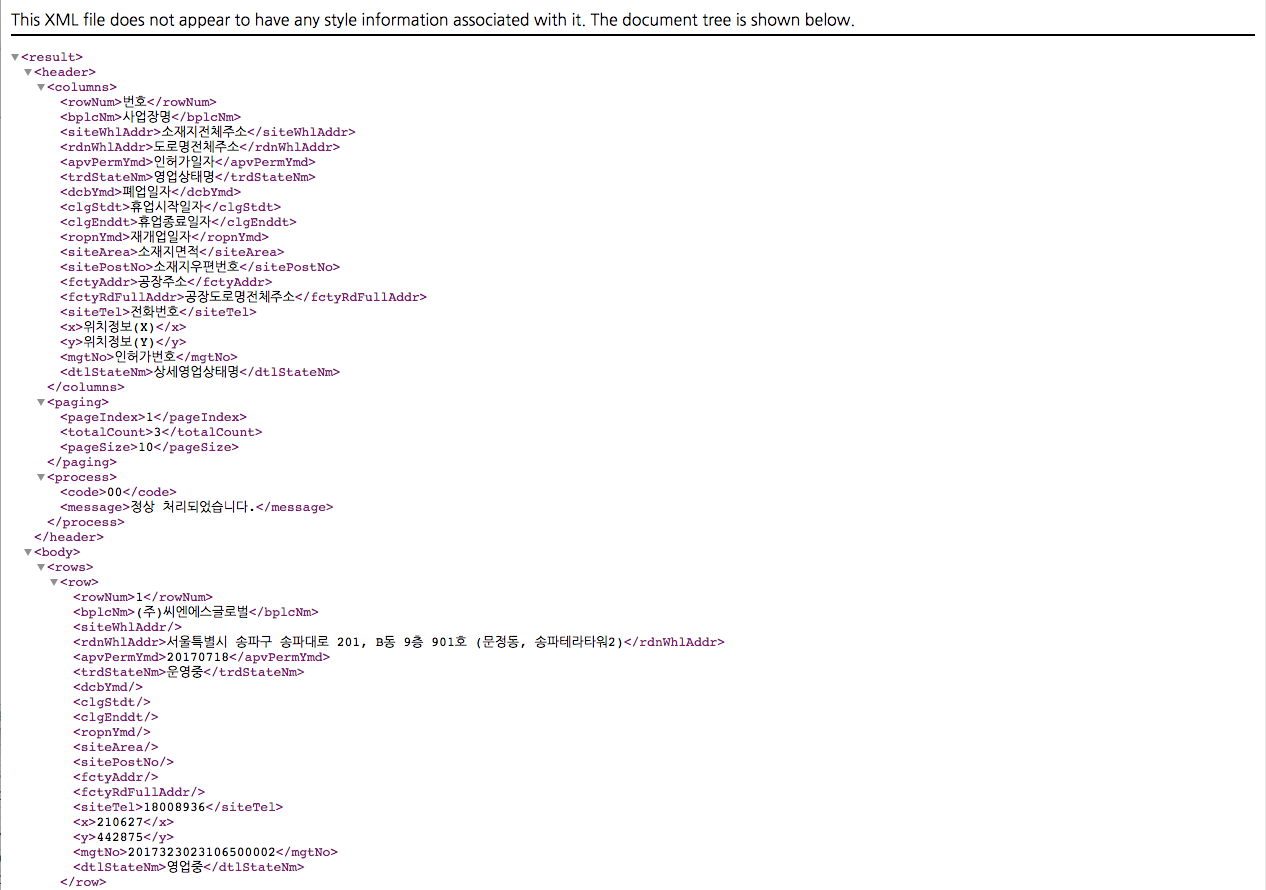

In [6]:
# "호출URL"에 인허가날짜, 소재지지역코드, 영업상태코드 등을 
# 추가함으로써 조회 범위를 특정할 수 있습니다. 
url <- "http://www.localdata.kr/platform/rest/43_05_01_P/openApi?authKey=K7vq=5eZhAPuTl1BwRXdQXVOAJl0DoQDQWqqopXgTEw="
bgnDate <- "20170101"  # 조회 시작일
endDate <- "20171231"  # 조회 종료일
localCd <- "6110000"   # 행정기관코드 "서울특별시"
state <- "01"          # 운영중, 폐업("03")

URL <- paste0(url,
              paste0("&bgnYmd=",bgnDate),
              paste0("&endYmd=",endDate),
              paste0("&localCode=",localCd),
              paste0("&state=",state))
print(URL)

# 위 URL로 접속하면 아래와 같은 화면이 출력됩니다. 
# 조회 조건에 맞는 사업체가 3건으로 줄었음을 확인할 수 있습니다. 
display_png(file="./Image/XML예시2.png")

## 사업체 리스트 수집
$$ $$
* 조건에 맞는 사업체 건수 조회
* 사업체 리스트 수집 및 정리

In [7]:
# 라이브러리를 불러옵니다.
library(XML)

# 호출URL로 xml을 불러옵니다. 
xmlParse <- xmlParse(url)
xmlParse

# 한 페이지당 10개씩 출력됩니다. 
# 조회 조건식에 페이지당 사업체수를 추가할 수 있습니다. 

<?xml version="1.0" encoding="UTF-8"?>
<result>
  <header>
    <columns>
      <rowNum>번호</rowNum>
      <bplcNm>사업장명</bplcNm>
      <siteWhlAddr>소재지전체주소</siteWhlAddr>
      <rdnWhlAddr>도로명전체주소</rdnWhlAddr>
      <apvPermYmd>인허가일자</apvPermYmd>
      <trdStateNm>영업상태명</trdStateNm>
      <dcbYmd>폐업일자</dcbYmd>
      <clgStdt>휴업시작일자</clgStdt>
      <clgEnddt>휴업종료일자</clgEnddt>
      <ropnYmd>재개업일자</ropnYmd>
      <siteArea>소재지면적</siteArea>
      <sitePostNo>소재지우편번호</sitePostNo>
      <fctyAddr>공장주소</fctyAddr>
      <fctyRdFullAddr>공장도로명전체주소</fctyRdFullAddr>
      <siteTel>전화번호</siteTel>
      <x>위치정보(X)</x>
      <y>위치정보(Y)</y>
      <mgtNo>인허가번호</mgtNo>
      <dtlStateNm>상세영업상태명</dtlStateNm>
    </columns>
    <paging>
      <pageIndex>1</pageIndex>
      <totalCount>60</totalCount>
      <pageSize>10</pageSize>
    </paging>
    <process>
      <code>00</code>
      <message>정상 처리되었습니다.</message>
    </process>
  </header>
  <body>
    <rows>
      <row>
        <rowNum>1</rowNum>
       

In [8]:
# xml을 리스트 형태로 변환합니다.
xmlData <- xmlToList(xmlParse)
xmlData

# header와 body로 구분됩니다. 
# header에서 컬럼명과 총 건수를 확인합니다. 
# 필요한 컬럼명의 상세 리스트는 body를 순환하며 수집하면 됩니다. 

$header
$header$columns
$header$columns$rowNum
[1] "번호"

$header$columns$bplcNm
[1] "사업장명"

$header$columns$siteWhlAddr
[1] "소재지전체주소"

$header$columns$rdnWhlAddr
[1] "도로명전체주소"

$header$columns$apvPermYmd
[1] "인허가일자"

$header$columns$trdStateNm
[1] "영업상태명"

$header$columns$dcbYmd
[1] "폐업일자"

$header$columns$clgStdt
[1] "휴업시작일자"

$header$columns$clgEnddt
[1] "휴업종료일자"

$header$columns$ropnYmd
[1] "재개업일자"

$header$columns$siteArea
[1] "소재지면적"

$header$columns$sitePostNo
[1] "소재지우편번호"

$header$columns$fctyAddr
[1] "공장주소"

$header$columns$fctyRdFullAddr
[1] "공장도로명전체주소"

$header$columns$siteTel
[1] "전화번호"

$header$columns$x
[1] "위치정보(X)"

$header$columns$y
[1] "위치정보(Y)"

$header$columns$mgtNo
[1] "인허가번호"

$header$columns$dtlStateNm
[1] "상세영업상태명"


$header$paging
$header$paging$pageIndex
[1] "1"

$header$paging$totalCount
[1] "60"

$header$paging$pageSize
[1] "10"


$header$process
$header$process$code
[1] "00"

$header$process$message
[1] "정상 처리되었습니다."



$body
$body$rows
$body$rows$row
$body

In [9]:
# 컬럼명들을 확인합니다. 
print(xmlData$header$columns)

$rowNum
[1] "번호"

$bplcNm
[1] "사업장명"

$siteWhlAddr
[1] "소재지전체주소"

$rdnWhlAddr
[1] "도로명전체주소"

$apvPermYmd
[1] "인허가일자"

$trdStateNm
[1] "영업상태명"

$dcbYmd
[1] "폐업일자"

$clgStdt
[1] "휴업시작일자"

$clgEnddt
[1] "휴업종료일자"

$ropnYmd
[1] "재개업일자"

$siteArea
[1] "소재지면적"

$sitePostNo
[1] "소재지우편번호"

$fctyAddr
[1] "공장주소"

$fctyRdFullAddr
[1] "공장도로명전체주소"

$siteTel
[1] "전화번호"

$x
[1] "위치정보(X)"

$y
[1] "위치정보(Y)"

$mgtNo
[1] "인허가번호"

$dtlStateNm
[1] "상세영업상태명"



In [10]:
# 제공되는 사업체 건수를 확인합니다. 
print(xmlData$header$paging)

# 첫 번째 페이지이고, 총 60건이 제공되며, 페이지당 10건이 제공됨을 알 수 있습니다. 

$pageIndex
[1] "1"

$totalCount
[1] "60"

$pageSize
[1] "10"



In [11]:
# 첫 번째 사업체 정보를 출력해보겠습니다. 
print(xmlData$body$rows$row)

$rowNum
[1] "1"

$bplcNm
[1] "이천계기사"

$siteWhlAddr
[1] "경기도 이천시 창전동 470번지 19호"

$rdnWhlAddr
[1] "경기도 이천시 중리천로 111-2 (창전동)"

$apvPermYmd
[1] "20160726"

$trdStateNm
[1] "운영중"

$dcbYmd
NULL

$clgStdt
NULL

$clgEnddt
NULL

$ropnYmd
NULL

$siteArea
NULL

$sitePostNo
NULL

$fctyAddr
NULL

$fctyRdFullAddr
NULL

$siteTel
[1] "0316389640"

$x
[1] "239846.99497700000  "

$y
[1] "419894.44853300000  "

$mgtNo
[1] "2016407008806500003"

$dtlStateNm
[1] "영업중"



In [12]:
# 사업장명만 출력해보겠습니다. 
print(xmlData$body$rows$row$bplcNm)

[1] "이천계기사"


In [13]:
# 10건의 사업장명을 출력해보겠습니다. 
for (i in 1:10) {
    print(xmlData$body$rows[[i]]$bplcNm)
}

# 위와 같이 필요한 컬럼을 문자열 벡터로 추출한 뒤 데이터 프레임으로 변환할 수 있습니다. 

[1] "이천계기사"
[1] "(주)카스"
[1] "카스전자저울 경기점"
[1] "케이아이에코시스템 주식회사"
[1] "광일계량소"
[1] "싸토리우스코리아(주)"
[1] "SMT"
[1] "(주)유카스에너지계량소"
[1] "(주)엑시스센시티브"
[1] "(주)웨이콘"


In [14]:
# 또는 sapply() 함수를 이용하여 특정 컬럼명만 추출할 수 있습니다. 
sapply(xmlData$body$rows, function(x) x$bplcNm)

row                           row 
                 "이천계기사"                    "(주)카스" 
                          row                           row 
        "카스전자저울 경기점" "케이아이에코시스템 주식회사" 
                          row                           row 
                 "광일계량소"        "싸토리우스코리아(주)" 
                          row                           row 
                        "SMT"      "(주)유카스에너지계량소" 
                          row                           row 
         "(주)엑시스센시티브"                  "(주)웨이콘"

In [15]:
# 이번에는 필요한 컬럼들로 구성된 데이터프레임을 생성해보겠습니다. 
# 사업장명, 소재지전체주소, 도로명전체주소, 인허가일자, 영업상태명, 폐업일자, 
# 소재지면적, 전화번호, 위치정보(X), 위치정보(Y) 등을 수집합니다. 

upjong <- "계량기수입업"
xmlRows <- xmlData$body$rows

compList <- data.frame(upjong = upjong,
                       shopNm = as.character(sapply(xmlRows, function(x) x$bplcNm)),
                       addrJb = as.character(sapply(xmlRows, function(x) x$siteWhlAddr)),
                       addrRd = as.character(sapply(xmlRows, function(x) x$rdnWhlAddr)),
                       apvPer = as.character(sapply(xmlRows, function(x) x$apvPermYmd)),
                       status = as.character(sapply(xmlRows, function(x) x$trdStateNm)),
                       shutDn = as.character(sapply(xmlRows, function(x) x$dcbYmd)),
                       volume = as.character(sapply(xmlRows, function(x) x$siteArea)),
                       phonno = as.character(sapply(xmlRows, function(x) x$siteTel)),
                       coordX = as.character(sapply(xmlRows, function(x) x$x)),
                       coordY = as.character(sapply(xmlRows, function(x) x$y)))

# 데이터프레임을 출력합니다. 
compList

upjong,shopNm,addrJb,addrRd,apvPer,status,shutDn,volume,phonno,coordX,coordY
계량기수입업,이천계기사,경기도 이천시 창전동 470번지 19호,경기도 이천시 중리천로 111-2 (창전동),20160726,운영중,NULL,NULL,0316389640,239846.99497700000,419894.44853300000
계량기수입업,(주)카스,NULL,경기도 양주시 광적면 그루고개로 262,20150305,운영중,NULL,NULL,0318201100,200384.37667500000,481775.49224200000
계량기수입업,카스전자저울 경기점,NULL,경기도 양주시 광적면 부흥로930번길 36,20170406,운영중,NULL,NULL,031 837 4661,199212.83813000000,478906.37496700000
계량기수입업,케이아이에코시스템 주식회사,NULL,광주광역시 북구 밤실로208번길 16 (두암동),20141105,폐업 등,20170222,NULL,062 269 9196,193980.05668800000,185453.14174800000
계량기수입업,광일계량소,경상북도 예천군 예천읍 대심리 435번지 2 호,NULL,19991122,운영중,NULL,NULL,054 652 0044,328758.675462,351275.390166
계량기수입업,싸토리우스코리아(주),NULL,"경기도 성남시 분당구 판교역로 220, 8층 (삼평동, 쏠리드스페이스)",20150317,운영중,NULL,NULL,031 622 5700,209804.21212100000,433459.16890400000
계량기수입업,SMT,NULL,"경기도 성남시 분당구 탄천상로 164, B동 107호 (구미동, 시그마2오피스텔)",20150413,운영중,NULL,NULL,031 715 8801,209444.95419900000,427238.42637700000
계량기수입업,(주)유카스에너지계량소,인천광역시 서구 경서동 363번지 217호,인천광역시 서구 경명대로 284 (경서동),20001123,폐업 등,20160713,NULL,032 486 7506,168222.56692700000,450825.27906000000
계량기수입업,(주)엑시스센시티브,NULL,경기도 화성시 마도면 송정로264번길 66 ((주)엑시스센시티브),20150805,운영중,NULL,NULL,02 26878100,182045.81299600000,413305.07512600000
계량기수입업,(주)웨이콘,NULL,"경상남도 양산시 주남로 288, 3307동 13호 (주남동, 영산대학교양산캠퍼스)",20160609,운영중,NULL,NULL,000016004523,395178.55589000000,216993.78239100000


In [16]:
# "NULL"로 기입된 항목을 공란으로 치환합니다. 
for (i in 1:length(compList)) {
    compList[compList[,i]=="NULL",i] <- ""
}

# 결과를 확인합니다. 
compList

upjong,shopNm,addrJb,addrRd,apvPer,status,shutDn,volume,phonno,coordX,coordY
계량기수입업,이천계기사,경기도 이천시 창전동 470번지 19호,경기도 이천시 중리천로 111-2 (창전동),20160726,운영중,,,0316389640,239846.99497700000,419894.44853300000
계량기수입업,(주)카스,,경기도 양주시 광적면 그루고개로 262,20150305,운영중,,,0318201100,200384.37667500000,481775.49224200000
계량기수입업,카스전자저울 경기점,,경기도 양주시 광적면 부흥로930번길 36,20170406,운영중,,,031 837 4661,199212.83813000000,478906.37496700000
계량기수입업,케이아이에코시스템 주식회사,,광주광역시 북구 밤실로208번길 16 (두암동),20141105,폐업 등,20170222,,062 269 9196,193980.05668800000,185453.14174800000
계량기수입업,광일계량소,경상북도 예천군 예천읍 대심리 435번지 2 호,,19991122,운영중,,,054 652 0044,328758.675462,351275.390166
계량기수입업,싸토리우스코리아(주),,"경기도 성남시 분당구 판교역로 220, 8층 (삼평동, 쏠리드스페이스)",20150317,운영중,,,031 622 5700,209804.21212100000,433459.16890400000
계량기수입업,SMT,,"경기도 성남시 분당구 탄천상로 164, B동 107호 (구미동, 시그마2오피스텔)",20150413,운영중,,,031 715 8801,209444.95419900000,427238.42637700000
계량기수입업,(주)유카스에너지계량소,인천광역시 서구 경서동 363번지 217호,인천광역시 서구 경명대로 284 (경서동),20001123,폐업 등,20160713,,032 486 7506,168222.56692700000,450825.27906000000
계량기수입업,(주)엑시스센시티브,,경기도 화성시 마도면 송정로264번길 66 ((주)엑시스센시티브),20150805,운영중,,,02 26878100,182045.81299600000,413305.07512600000
계량기수입업,(주)웨이콘,,"경상남도 양산시 주남로 288, 3307동 13호 (주남동, 영산대학교양산캠퍼스)",20160609,운영중,,,000016004523,395178.55589000000,216993.78239100000


In [17]:
# 이번에는 전체 리스트를 받기 위해서 호출URL에 조건식을 추가해보겠습니다. 
# 한 페이지당 1000개씩 출력되도록 변경합니다. 
url2 <- paste0(url, "&pageSize=1000")
xmlParse <- xmlParse(url2)
xmlData <- xmlToList(xmlParse)

# 한 페이지에 출력된 건수를 확인합니다. 
xmlData$header$paging

$pageIndex
[1] "1"

$totalCount
[1] "60"

$pageSize
[1] "1000"

In [18]:
# 전체 사업체 리스트를 데이터 프레임으로 정리해보겠습니다. 
xmlRows <- xmlData$body$rows

compList <- data.frame(upjong = upjong,
                       shopNm = as.character(sapply(xmlRows, function(x) x$bplcNm)),
                       addrJb = as.character(sapply(xmlRows, function(x) x$siteWhlAddr)),
                       addrRd = as.character(sapply(xmlRows, function(x) x$rdnWhlAddr)),
                       apvPer = as.character(sapply(xmlRows, function(x) x$apvPermYmd)),
                       status = as.character(sapply(xmlRows, function(x) x$trdStateNm)),
                       shutDn = as.character(sapply(xmlRows, function(x) x$dcbYmd)),
                       volume = as.character(sapply(xmlRows, function(x) x$siteArea)),
                       phonno = as.character(sapply(xmlRows, function(x) x$siteTel)),
                       coordX = as.character(sapply(xmlRows, function(x) x$x)),
                       coordY = as.character(sapply(xmlRows, function(x) x$y)))

# 데이터의 구조를 확인합니다. 
str(compList)
head(compList, 10)

'data.frame':	60 obs. of  11 variables:
 $ upjong: chr  "계량기수입업" "계량기수입업" "계량기수입업" "계량기수입업" ...
 $ shopNm: chr  "이천계기사" "(주)카스" "카스전자저울 경기점" "케이아이에코시스템 주식회사" ...
 $ addrJb: chr  "경기도 이천시 창전동 470번지 19호" "NULL" "NULL" "NULL" ...
 $ addrRd: chr  "경기도 이천시 중리천로 111-2 (창전동)" "경기도 양주시 광적면 그루고개로 262" "경기도 양주시 광적면 부흥로930번길 36" "광주광역시 북구 밤실로208번길 16 (두암동)" ...
 $ apvPer: chr  "20160726" "20150305" "20170406" "20141105" ...
 $ status: chr  "운영중" "운영중" "운영중" "폐업 등" ...
 $ shutDn: chr  "NULL" "NULL" "NULL" "20170222" ...
 $ volume: chr  "NULL" "NULL" "NULL" "NULL" ...
 $ phonno: chr  "0316389640" "0318201100" "031 837 4661" "062 269 9196" ...
 $ coordX: chr  "239846.99497700000  " "200384.37667500000  " "199212.83813000000  " "193980.05668800000  " ...
 $ coordY: chr  "419894.44853300000  " "481775.49224200000  " "478906.37496700000  " "185453.14174800000  " ...


upjong,shopNm,addrJb,addrRd,apvPer,status,shutDn,volume,phonno,coordX,coordY
계량기수입업,이천계기사,경기도 이천시 창전동 470번지 19호,경기도 이천시 중리천로 111-2 (창전동),20160726,운영중,NULL,NULL,0316389640,239846.99497700000,419894.44853300000
계량기수입업,(주)카스,NULL,경기도 양주시 광적면 그루고개로 262,20150305,운영중,NULL,NULL,0318201100,200384.37667500000,481775.49224200000
계량기수입업,카스전자저울 경기점,NULL,경기도 양주시 광적면 부흥로930번길 36,20170406,운영중,NULL,NULL,031 837 4661,199212.83813000000,478906.37496700000
계량기수입업,케이아이에코시스템 주식회사,NULL,광주광역시 북구 밤실로208번길 16 (두암동),20141105,폐업 등,20170222,NULL,062 269 9196,193980.05668800000,185453.14174800000
계량기수입업,광일계량소,경상북도 예천군 예천읍 대심리 435번지 2 호,NULL,19991122,운영중,NULL,NULL,054 652 0044,328758.675462,351275.390166
계량기수입업,싸토리우스코리아(주),NULL,"경기도 성남시 분당구 판교역로 220, 8층 (삼평동, 쏠리드스페이스)",20150317,운영중,NULL,NULL,031 622 5700,209804.21212100000,433459.16890400000
계량기수입업,SMT,NULL,"경기도 성남시 분당구 탄천상로 164, B동 107호 (구미동, 시그마2오피스텔)",20150413,운영중,NULL,NULL,031 715 8801,209444.95419900000,427238.42637700000
계량기수입업,(주)유카스에너지계량소,인천광역시 서구 경서동 363번지 217호,인천광역시 서구 경명대로 284 (경서동),20001123,폐업 등,20160713,NULL,032 486 7506,168222.56692700000,450825.27906000000
계량기수입업,(주)엑시스센시티브,NULL,경기도 화성시 마도면 송정로264번길 66 ((주)엑시스센시티브),20150805,운영중,NULL,NULL,02 26878100,182045.81299600000,413305.07512600000
계량기수입업,(주)웨이콘,NULL,"경상남도 양산시 주남로 288, 3307동 13호 (주남동, 영산대학교양산캠퍼스)",20160609,운영중,NULL,NULL,000016004523,395178.55589000000,216993.78239100000


In [19]:
# 한 페이지당 10건씩 출력되는 호출URL의 2번째 페이지를 불러오겠습니다. 
url3 <- paste0(url, "&pageIndex=2")
xmlParse <- xmlParse(url3)
xmlData <- xmlToList(xmlParse)

# 한 페이지에 출력된 건수를 확인합니다. 
xmlData$header$paging

$pageIndex
[1] "2"

$totalCount
[1] "60"

$pageSize
[1] "10"

In [20]:
# 한 페이지당 100,000건도 가능한 것 같습니다만, 
# 조회 기간이 길고, "한식"처럼 사업체수가 많은 경우 
# 페이지를 순환하며 수집해야 합니다. 

# 마지막으로 페이지를 순환하며 데이터를 수집하는 방법을 알려드리겠습니다. 
# 10건씩 6개 페이지로 나누어 수집하면 됩니다. 

compList <- data.frame()

for (i in 1:6) {
    tryCatch({
        URL <- paste0(url, "&pageIndex=", i)
        cat("호출URL:", URL, "\n")
    
        xmlParse <- xmlParse(URL)
        xmlData <- xmlToList(xmlParse)
        xmlRows <- xmlData$body$rows

        cList <- data.frame(upjong = upjong,
                            shopNm = as.character(sapply(xmlRows, function(x) x$bplcNm)),
                            addrJb = as.character(sapply(xmlRows, function(x) x$siteWhlAddr)),
                            addrRd = as.character(sapply(xmlRows, function(x) x$rdnWhlAddr)),
                            apvPer = as.character(sapply(xmlRows, function(x) x$apvPermYmd)),
                            status = as.character(sapply(xmlRows, function(x) x$trdStateNm)),
                            shutDn = as.character(sapply(xmlRows, function(x) x$dcbYmd)),
                            volume = as.character(sapply(xmlRows, function(x) x$siteArea)),
                            phonno = as.character(sapply(xmlRows, function(x) x$siteTel)),
                            coordX = as.character(sapply(xmlRows, function(x) x$x)),
                            coordY = as.character(sapply(xmlRows, function(x) x$y)))
        compList <- rbind(compList, cList)
    }, error=function(e){})
}

호출URL: http://www.localdata.kr/platform/rest/43_05_01_P/openApi?authKey=K7vq=5eZhAPuTl1BwRXdQXVOAJl0DoQDQWqqopXgTEw=&pageIndex=1 
호출URL: http://www.localdata.kr/platform/rest/43_05_01_P/openApi?authKey=K7vq=5eZhAPuTl1BwRXdQXVOAJl0DoQDQWqqopXgTEw=&pageIndex=2 
호출URL: http://www.localdata.kr/platform/rest/43_05_01_P/openApi?authKey=K7vq=5eZhAPuTl1BwRXdQXVOAJl0DoQDQWqqopXgTEw=&pageIndex=3 
호출URL: http://www.localdata.kr/platform/rest/43_05_01_P/openApi?authKey=K7vq=5eZhAPuTl1BwRXdQXVOAJl0DoQDQWqqopXgTEw=&pageIndex=4 
호출URL: http://www.localdata.kr/platform/rest/43_05_01_P/openApi?authKey=K7vq=5eZhAPuTl1BwRXdQXVOAJl0DoQDQWqqopXgTEw=&pageIndex=5 
호출URL: http://www.localdata.kr/platform/rest/43_05_01_P/openApi?authKey=K7vq=5eZhAPuTl1BwRXdQXVOAJl0DoQDQWqqopXgTEw=&pageIndex=6 


In [21]:
# "NULL"로 기입된 항목을 공란으로 치환합니다. 
for (i in 1:length(compList)) {
    compList[compList[,i]=="NULL",i] <- ""
}

# 최종 결과를 확인합니다. 
str(compList)
head(compList, 10)

'data.frame':	60 obs. of  11 variables:
 $ upjong: chr  "계량기수입업" "계량기수입업" "계량기수입업" "계량기수입업" ...
 $ shopNm: chr  "이천계기사" "(주)카스" "카스전자저울 경기점" "케이아이에코시스템 주식회사" ...
 $ addrJb: chr  "경기도 이천시 창전동 470번지 19호" "" "" "" ...
 $ addrRd: chr  "경기도 이천시 중리천로 111-2 (창전동)" "경기도 양주시 광적면 그루고개로 262" "경기도 양주시 광적면 부흥로930번길 36" "광주광역시 북구 밤실로208번길 16 (두암동)" ...
 $ apvPer: chr  "20160726" "20150305" "20170406" "20141105" ...
 $ status: chr  "운영중" "운영중" "운영중" "폐업 등" ...
 $ shutDn: chr  "" "" "" "20170222" ...
 $ volume: chr  "" "" "" "" ...
 $ phonno: chr  "0316389640" "0318201100" "031 837 4661" "062 269 9196" ...
 $ coordX: chr  "239846.99497700000  " "200384.37667500000  " "199212.83813000000  " "193980.05668800000  " ...
 $ coordY: chr  "419894.44853300000  " "481775.49224200000  " "478906.37496700000  " "185453.14174800000  " ...


upjong,shopNm,addrJb,addrRd,apvPer,status,shutDn,volume,phonno,coordX,coordY
계량기수입업,이천계기사,경기도 이천시 창전동 470번지 19호,경기도 이천시 중리천로 111-2 (창전동),20160726,운영중,,,0316389640,239846.99497700000,419894.44853300000
계량기수입업,(주)카스,,경기도 양주시 광적면 그루고개로 262,20150305,운영중,,,0318201100,200384.37667500000,481775.49224200000
계량기수입업,카스전자저울 경기점,,경기도 양주시 광적면 부흥로930번길 36,20170406,운영중,,,031 837 4661,199212.83813000000,478906.37496700000
계량기수입업,케이아이에코시스템 주식회사,,광주광역시 북구 밤실로208번길 16 (두암동),20141105,폐업 등,20170222,,062 269 9196,193980.05668800000,185453.14174800000
계량기수입업,광일계량소,경상북도 예천군 예천읍 대심리 435번지 2 호,,19991122,운영중,,,054 652 0044,328758.675462,351275.390166
계량기수입업,싸토리우스코리아(주),,"경기도 성남시 분당구 판교역로 220, 8층 (삼평동, 쏠리드스페이스)",20150317,운영중,,,031 622 5700,209804.21212100000,433459.16890400000
계량기수입업,SMT,,"경기도 성남시 분당구 탄천상로 164, B동 107호 (구미동, 시그마2오피스텔)",20150413,운영중,,,031 715 8801,209444.95419900000,427238.42637700000
계량기수입업,(주)유카스에너지계량소,인천광역시 서구 경서동 363번지 217호,인천광역시 서구 경명대로 284 (경서동),20001123,폐업 등,20160713,,032 486 7506,168222.56692700000,450825.27906000000
계량기수입업,(주)엑시스센시티브,,경기도 화성시 마도면 송정로264번길 66 ((주)엑시스센시티브),20150805,운영중,,,02 26878100,182045.81299600000,413305.07512600000
계량기수입업,(주)웨이콘,,"경상남도 양산시 주남로 288, 3307동 13호 (주남동, 영산대학교양산캠퍼스)",20160609,운영중,,,000016004523,395178.55589000000,216993.78239100000


## [추가] httr & rvest 라이브러리 이용하기
$$ $$
* 앞서 선보인 XML 라이브러리를 대신하는 xml2 라이브러리가 있습니다. 
  - 물론 XML 라이브러리 함수들도 여전히 사용할 수 있습니다. 
$$ $$
* 여기에서 httr, rvest 라이브러리를 활용하는 방법을 추가하겠습니다. 
  - httr의 GET() 함수로 url에 request를 보낸 후 response를 받습니다. 
  - response를 rvest의 read_xml() 함수를 활용하여 xml을 parsing 합니다. 
  - 이후, xml_nodes() 및 xml_text() 함수 등을 이용하여 원하는 텍스트만 수집할 수 있습니다. 

In [22]:
# 라이브러리를 불러옵니다.
library(httr)

# 호출URL로 xml을 불러옵니다. 
resp <- GET(url)
resp

# response status code가 정상(200)입니다.

Response [http://www.localdata.kr/platform/rest/43_05_01_P/openApi?authKey=K7vq=5eZhAPuTl1BwRXdQXVOAJl0DoQDQWqqopXgTEw=]
  Date: 2017-09-12 23:47
  Status: 200
  Content-Type: text/xml;charset=UTF-8
  Size: 9.04 kB
<?xml version="1.0" encoding="UTF-8"?>
<result>
  <header>
    <columns>
      <rowNum>번호</rowNum>
      <bplcNm>사업장명</bplcNm>
      <siteWhlAddr>소재지전체주소</siteWhlAddr>
      <rdnWhlAddr>도로명전체주소</rdnWhlAddr>
      <apvPermYmd>인허가일자</apvPermYmd>
      <trdStateNm>영업상태명</trdStateNm>
...

In [23]:
# 라이브러리를 불러옵니다.
library(rvest)

# xml을 읽습니다.
xml <- read_xml(resp)
xml

Loading required package: xml2

Attaching package: ‘rvest’

The following object is masked from ‘package:XML’:

    xml



{xml_document}
<result>
[1] <header>\n  <columns>\n    <rowNum>번호</rowNum>\n    <bplcNm>사업장명</bplcNm> ...
[2] <body>\n  <rows>\n    <row>\n      <rowNum>1</rowNum>\n      <bplcNm>이천계기 ...

In [24]:
# 반복되는 패턴을 지정합니다. 
# 이번 예제에서는 "body > rows > row"이 반복되고 있습니다. 
rows <- xml %>% xml_nodes("row")
rows

{xml_nodeset (10)}
 [1] <row>\n  <rowNum>1</rowNum>\n  <bplcNm>이천계기사</bplcNm>\n  <siteWhlAddr>경기 ...
 [2] <row>\n  <rowNum>2</rowNum>\n  <bplcNm>(주)카스</bplcNm>\n  <siteWhlAddr/>\ ...
 [3] <row>\n  <rowNum>3</rowNum>\n  <bplcNm>카스전자저울 경기점</bplcNm>\n  <siteWhlAd ...
 [4] <row>\n  <rowNum>4</rowNum>\n  <bplcNm>케이아이에코시스템 주식회사</bplcNm>\n  <siteW ...
 [5] <row>\n  <rowNum>5</rowNum>\n  <bplcNm>광일계량소</bplcNm>\n  <siteWhlAddr>경상 ...
 [6] <row>\n  <rowNum>6</rowNum>\n  <bplcNm>싸토리우스코리아(주)</bplcNm>\n  <siteWhlA ...
 [7] <row>\n  <rowNum>7</rowNum>\n  <bplcNm>SMT</bplcNm>\n  <siteWhlAddr/>\n  ...
 [8] <row>\n  <rowNum>8</rowNum>\n  <bplcNm>(주)유카스에너지계량소</bplcNm>\n  <siteWhl ...
 [9] <row>\n  <rowNum>9</rowNum>\n  <bplcNm>(주)엑시스센시티브</bplcNm>\n  <siteWhlAd ...
[10] <row>\n  <rowNum>10</rowNum>\n  <bplcNm>(주)웨이콘</bplcNm>\n  <siteWhlAddr/ ...

In [25]:
# 원하는 컬럼명의 텍스트를 추출해보겠습니다. 
# 예제로 사업장명만 추출합니다. 
rows %>% xml_nodes("bplcNm") %>% xml_text()

[1] "이천계기사"                  "(주)카스"                   
 [3] "카스전자저울 경기점"         "케이아이에코시스템 주식회사"
 [5] "광일계량소"                  "싸토리우스코리아(주)"       
 [7] "SMT"                         "(주)유카스에너지계량소"     
 [9] "(주)엑시스센시티브"          "(주)웨이콘"

In [26]:
# 위와 같은 방법으로 텍스트를 추출해주는 나만의 함수를 하나 만듭니다. 
getXmlText <- function(x, var) {
    result <- x %>% xml_nodes(var) %>% xml_text()
    return(result)
}

In [27]:
# 나만의 함수를 테스트합니다. 
shopNm <- getXmlText(rows, "bplcNm")
shopNm

[1] "이천계기사"                  "(주)카스"                   
 [3] "카스전자저울 경기점"         "케이아이에코시스템 주식회사"
 [5] "광일계량소"                  "싸토리우스코리아(주)"       
 [7] "SMT"                         "(주)유카스에너지계량소"     
 [9] "(주)엑시스센시티브"          "(주)웨이콘"

In [28]:
# 마지막으로 필요한 필요한 컬럼들로 구성된 데이터프레임을 생성해보겠습니다. 
upjong <- "계량기수입업"

compList <- data.frame(upjong = upjong,
                       shopNm = getXmlText(rows, "bplcNm"),
                       addrJb = getXmlText(rows, "siteWhlAddr"),
                       addrRd = getXmlText(rows, "rdnWhlAddr"),
                       apvPer = getXmlText(rows, "apvPermYmd"),
                       status = getXmlText(rows, "trdStateNm"),
                       shutDn = getXmlText(rows, "dcbYmd"),
                       volume = getXmlText(rows, "siteArea"),
                       phonno = getXmlText(rows, "siteTel"),
                       coordX = getXmlText(rows, "x"),
                       coordY = getXmlText(rows, "y"))

# 데이터프레임을 출력합니다. 
compList

upjong,shopNm,addrJb,addrRd,apvPer,status,shutDn,volume,phonno,coordX,coordY
계량기수입업,이천계기사,경기도 이천시 창전동 470번지 19호,경기도 이천시 중리천로 111-2 (창전동),20160726,운영중,,,0316389640,239846.99497700000,419894.44853300000
계량기수입업,(주)카스,,경기도 양주시 광적면 그루고개로 262,20150305,운영중,,,0318201100,200384.37667500000,481775.49224200000
계량기수입업,카스전자저울 경기점,,경기도 양주시 광적면 부흥로930번길 36,20170406,운영중,,,031 837 4661,199212.83813000000,478906.37496700000
계량기수입업,케이아이에코시스템 주식회사,,광주광역시 북구 밤실로208번길 16 (두암동),20141105,폐업 등,20170222,,062 269 9196,193980.05668800000,185453.14174800000
계량기수입업,광일계량소,경상북도 예천군 예천읍 대심리 435번지 2 호,,19991122,운영중,,,054 652 0044,328758.675462,351275.390166
계량기수입업,싸토리우스코리아(주),,"경기도 성남시 분당구 판교역로 220, 8층 (삼평동, 쏠리드스페이스)",20150317,운영중,,,031 622 5700,209804.21212100000,433459.16890400000
계량기수입업,SMT,,"경기도 성남시 분당구 탄천상로 164, B동 107호 (구미동, 시그마2오피스텔)",20150413,운영중,,,031 715 8801,209444.95419900000,427238.42637700000
계량기수입업,(주)유카스에너지계량소,인천광역시 서구 경서동 363번지 217호,인천광역시 서구 경명대로 284 (경서동),20001123,폐업 등,20160713,,032 486 7506,168222.56692700000,450825.27906000000
계량기수입업,(주)엑시스센시티브,,경기도 화성시 마도면 송정로264번길 66 ((주)엑시스센시티브),20150805,운영중,,,02 26878100,182045.81299600000,413305.07512600000
계량기수입업,(주)웨이콘,,"경상남도 양산시 주남로 288, 3307동 13호 (주남동, 영산대학교양산캠퍼스)",20160609,운영중,,,000016004523,395178.55589000000,216993.78239100000


## 마무리하며...
$$ $$
* 현재 제공되는 데이터는 10개 업태에 대해 463개 업종입니다. 
  - 식당 업태만 하더라도 30여 가지가 넘는 업종이 속합니다. 
  - 따라서 필요한 업종을 선별하여 "호출URL"을 csv 파일로 정리하시면 편합니다. 
$$ $$
* 마지막에 언급한 "페이지를 순환하며 수집하는" 방법을 나만의 함수로 만드시면  
  업종별 리스트를 빠르게 만들 수 있습니다!! 
$$ $$
* 데이터 분석에 앞서 날짜 관련 컬럼과 주소 관련 컬럼은 전처리 과정을 거쳐야 합니다. 
  - 날짜는 as.Date() 함수 등과 lubridate 라이브러리에서 제공되는 함수들을 이용하시면 편합니다. 
  - 주소는 grep(), gsub(), 정규식 등을 사용하셔서 정제하시기 바랍니다. 

# End Document